# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-03-31 ~ 2024-04-01
* 데이터 분석 목적: 토이프로젝트 대상 적합성 판단
* 데이터 출처: [UK Road Traffic Collision Dataset](https://www.kaggle.com/datasets/salmankhaliq22/road-traffic-collision-dataset/data)

# 1. 기초 설정

In [1]:
# 사용한 라이브러리

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [3]:
# 데이터 불러오기

data_origin = pd.read_csv('../../data/accident_data.csv')
data = data_origin.copy()

# 2. 데이터 특성 파악 및 전처리

## 2-1. 기본 특성

In [4]:
# 출력 예시 확인
data.sample(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
410304,200701ZD30654,B,266.0,NaN,0.0,Slight,NaN,10/12/2007,Monday,2.0,Data missing or out of range,Not at junction or within 20 metres,51.403639,Daylight,Croydon,Croydon,533500.0,168930.0,-0.082110,E01001139,1,3,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,08:25,Urban,Raining no high winds,2007,No
334895,200645GU80359,B,3012.0,NaN,0.0,Slight,NaN,03/02/2006,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.297554,Darkness - no lighting,Guildford,Surrey,490770.0,156190.0,-0.699464,E01030473,2,1,0.0,0.0,Surrey,Dry,Single carriageway,NaN,60,00:37,Rural,Fine no high winds,2006,No
998183,2010400C00834,A,505.0,A,5065.0,Serious,NaN,22/03/2010,Monday,1.0,Give way or uncontrolled,Roundabout,51.881545,Daylight,Luton,Luton,508580.0,221510.0,-0.423914,E01015729,1,2,0.0,0.0,Bedfordshire,Dry,Single carriageway,NaN,30,10:30,Urban,Fine no high winds,2010,No
1038962,201054EO22610,B,4040.0,C,70.0,Slight,NaN,22/06/2010,Tuesday,1.0,Give way or uncontrolled,Crossroads,51.634446,Daylight,Wiltshire,Wiltshire,407970.0,192860.0,-1.886254,E01031934,1,2,0.0,0.0,Wiltshire,Dry,Single carriageway,NaN,60,10:55,Rural,Fine no high winds,2010,No
31632,200504DA05023,A,59.0,A,5071.0,Serious,NaN,25/05/2005,Wednesday,1.0,Auto traffic signal,Crossroads,53.759150,Daylight,Preston,Lancashire,353640.0,429430.0,-2.704681,E01025307,1,2,0.0,5.0,Lancashire,Dry,Dual carriageway,NaN,30,14:55,Urban,Fine no high winds,2005,No
944053,2.01007E+12,A,50.0,Unclassified,0.0,Serious,NaN,05/07/2010,Monday,1.0,Give way or uncontrolled,T or staggered junction,53.344090,Daylight,Cheshire East,Cheshire East,371300.0,383110.0,-2.432555,E01018599,1,2,0.0,0.0,Cheshire,Dry,Single carriageway,NaN,60,20:42,Rural,Fine no high winds,2010,No
385169,200697LC70110,NaN,0.0,A,814.0,Slight,NaN,13/10/2006,Friday,1.0,Auto traffic signal,Crossroads,55.913349,Darkness - lights lit,West Dunbartonshire,West Dunbartonshire,247940.0,671590.0,-4.434491,NaN,1,2,0.0,5.0,Strathclyde,Dry,Single carriageway,NaN,30,19:00,Urban,Fine no high winds,2006,Yes
1042350,201060L136684,NaN,0.0,Unclassified,0.0,Slight,NaN,26/07/2010,Monday,2.0,Give way or uncontrolled,Other junction,53.043360,Daylight,Wrexham,Wrexham,334890.0,350010.0,-2.972629,W01000413,1,2,0.0,0.0,North Wales,Dry,Single carriageway,NaN,30,16:30,Urban,Fine no high winds,2010,No
7042,200501JC30817,A,1007.0,Unclassified,0.0,Slight,NaN,16/11/2005,Wednesday,2.0,Give way or uncontrolled,T or staggered junction,51.583299,Daylight,Waltham Forest,Waltham Forest,539370.0,189080.0,0.010178,E01004362,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30,16:20,Urban,Fine no high winds,2005,No
379040,2.00695E+12,A,90.0,NaN,0.0,Serious,NaN,31/03/2006,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.962482,Daylight,"Edinburgh, City of","Edinburgh, City of",318070.0,675160.0,-3.313985,NaN,1,1,0.0,5.0,Lothian and Borders,Dry,Single carriageway,NaN,40,17:08,Urban,Fine no high winds,2006,Yes


In [5]:
# 행과 열
print("행:", data.shape[0], "열:", data.shape[1], "\n")

행: 1048575 열: 34 



In [6]:
# 컬럼 리스트
data_cols = list(data.columns)
data_cols

['Accident_Index',
 '1st_Road_Class',
 '1st_Road_Number',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Accident_Severity',
 'Carriageway_Hazards',
 'Date',
 'Day_of_Week',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Control',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'LSOA_of_Accident_Location',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Year',
 'InScotland']

In [7]:
# 변수 타입
data_types = data.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['Accident_Index', '1st_Road_Class', '2nd_Road_Class', 'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']

양적 변수: ['1st_Road_Number', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit', 'Year']


## 2-2. 질적 변수

In [8]:
# 고유값
small_qual = []

for qual in qual_vari:
    uniq_num = data[qual].describe(include='all').T['unique']
    print(qual, "고유값 개수:", uniq_num)

    if uniq_num < 20:
        small_qual.append(qual) #막대그래프로 시각화하기 위함
        print("고유값:", data[qual].unique())

    print()

Accident_Index 고유값 개수: 671340

1st_Road_Class 고유값 개수: 5
고유값: ['A' 'B' 'C' nan 'Motorway' 'A(M)']

2nd_Road_Class 고유값 개수: 6
고유값: [nan 'C' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']

Accident_Severity 고유값 개수: 3
고유값: ['Serious' 'Slight' 'Fatal']

Carriageway_Hazards 고유값 개수: 5
고유값: [nan 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)']

Date 고유값 개수: 2191

Day_of_Week 고유값 개수: 7
고유값: ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']

Junction_Control 고유값 개수: 7
고유값: ['Data missing or out of range' 'Auto traffic signal'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']

Junction_Detail 고유값 개수: 10
고유값: ['Not at junction or within 20 metres' 'Crossroads'
 'T or staggered junction' 'Mini-roundabout' 'Other junction'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Roundabout' 'Sl

In [9]:
# subplot 행렬 차원 계산
num_lists = len(small_qual)
num_rows = int(num_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
num_cols = (num_lists + num_rows - 1) // num_rows  # 가장 가까운 값을 사용하여 열 개수 계산

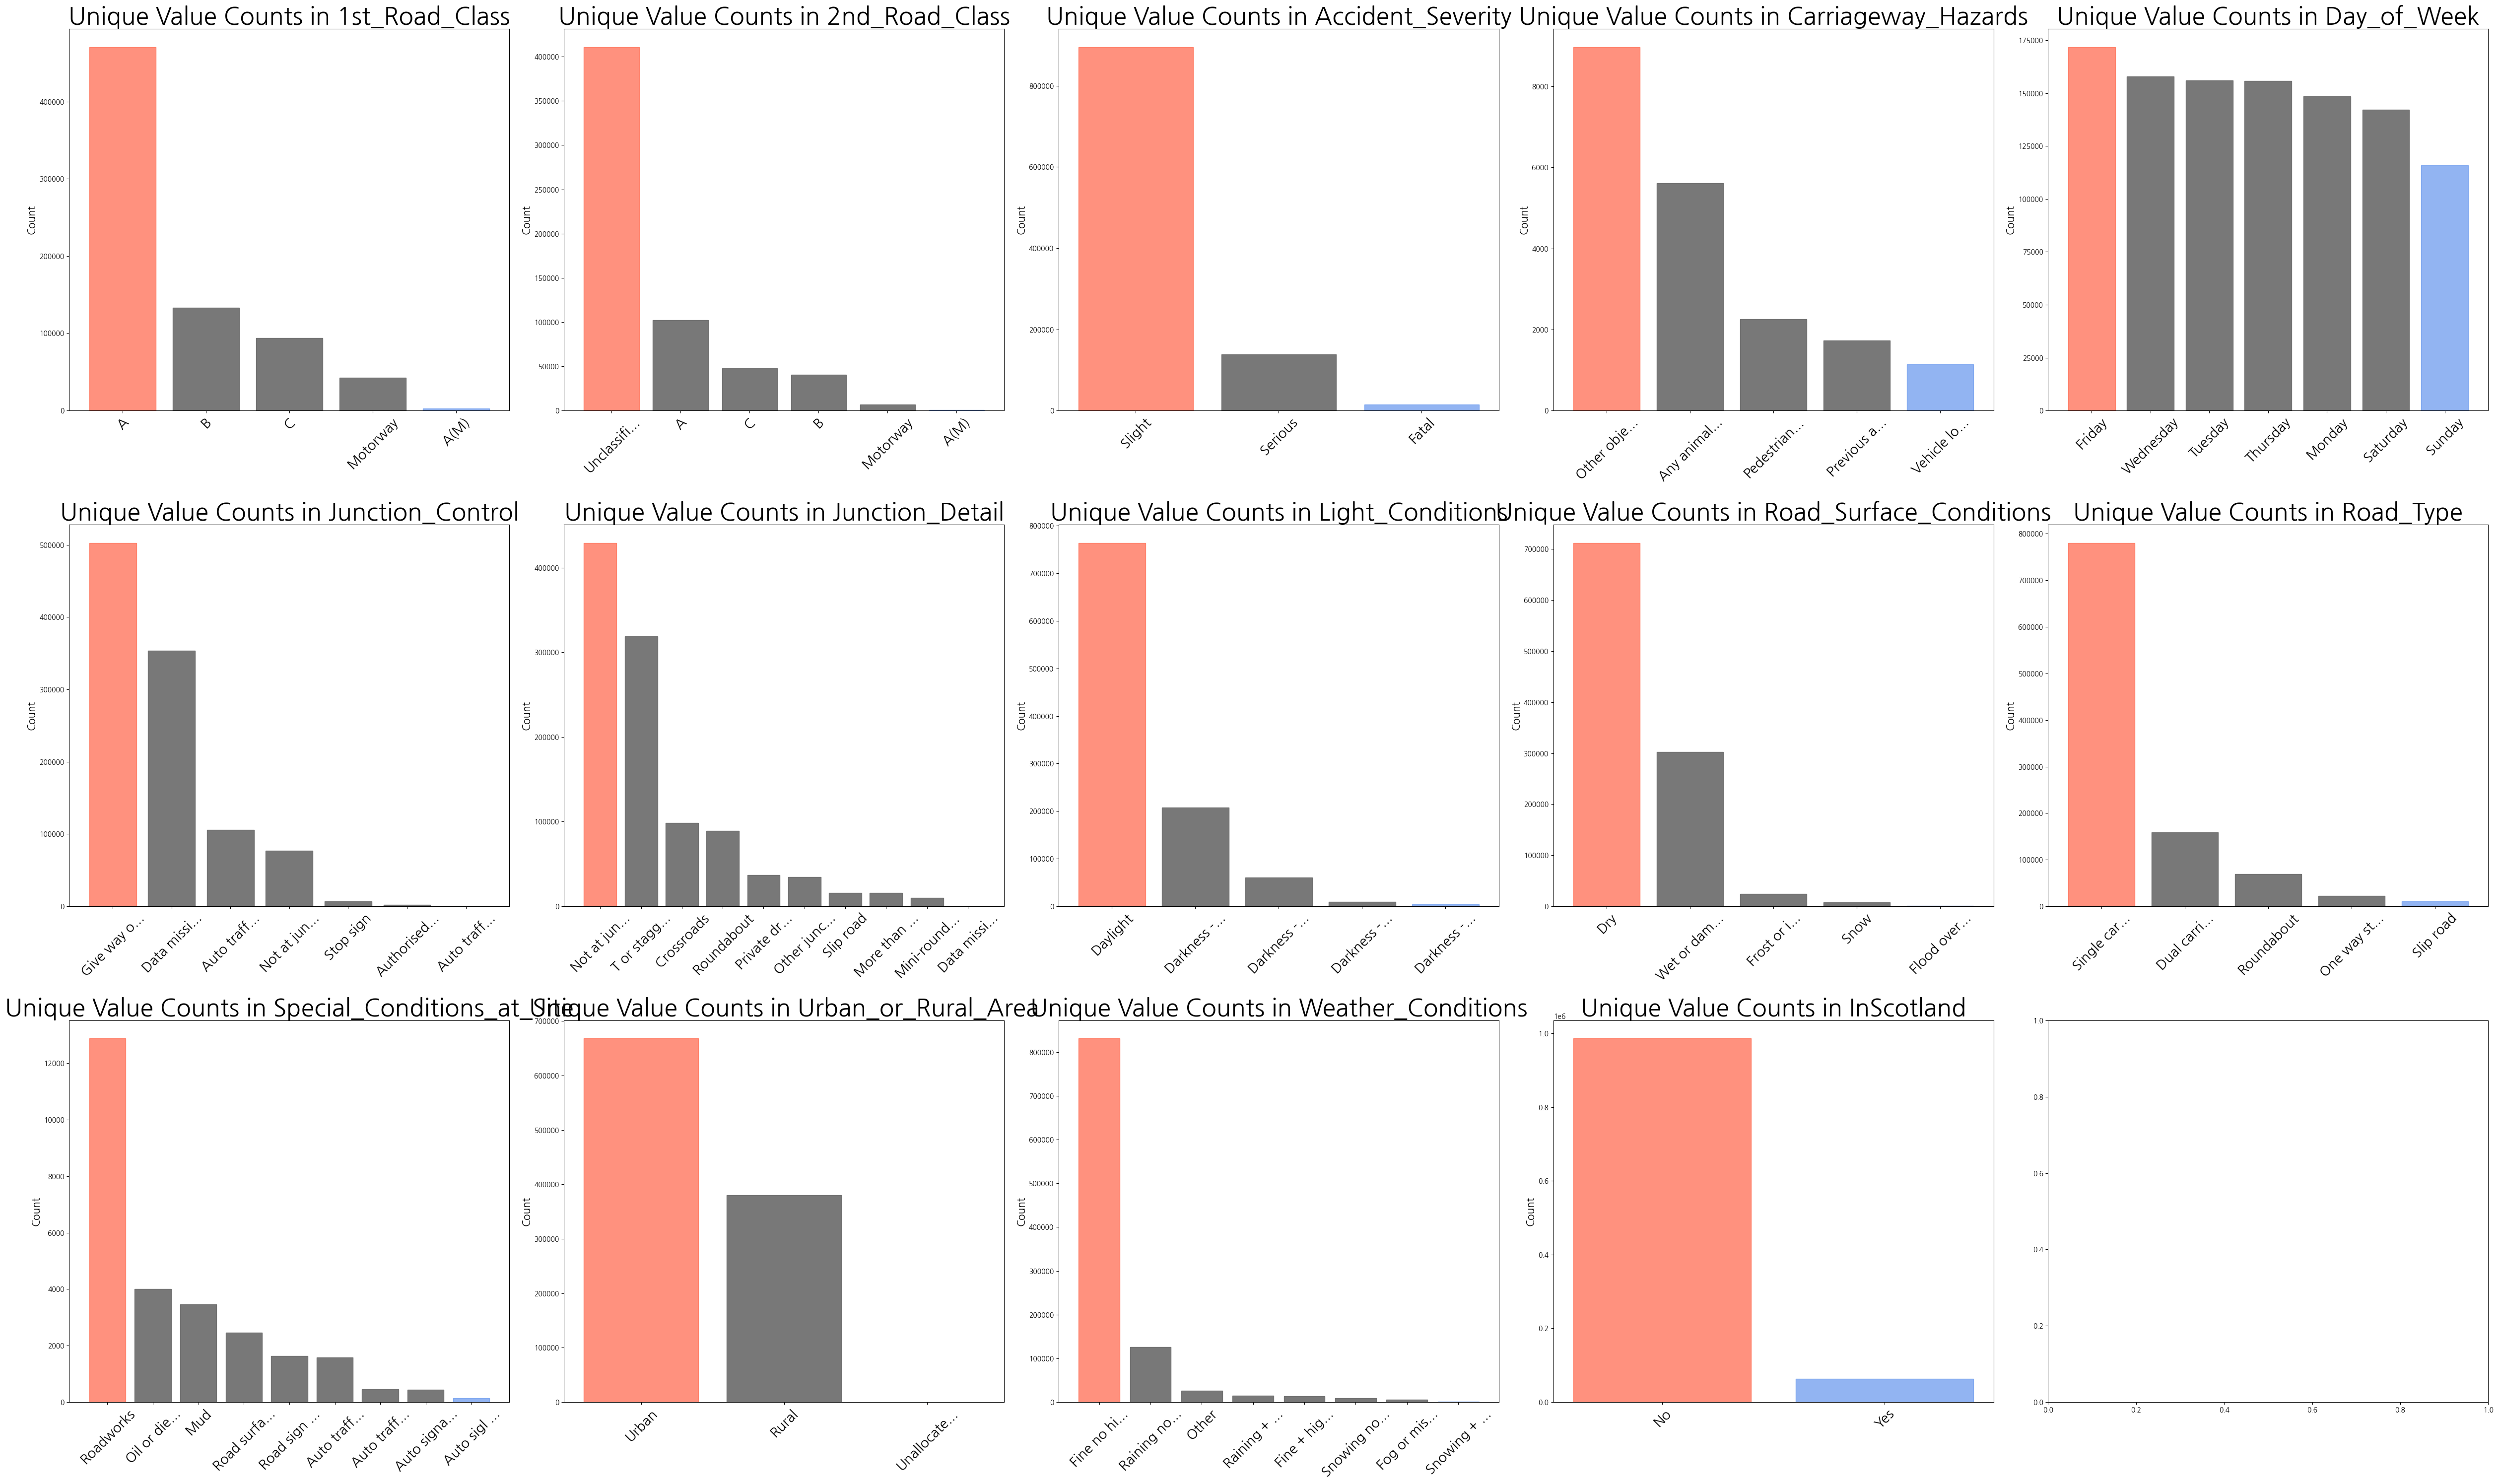

In [10]:
# Barplot 시각화
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 30)) #plot 생성

for i, col in enumerate(small_qual):
    unique_values = data[col].value_counts().to_dict() #각 컬럼 고유값 개수 계산
    x = list(unique_values.keys())
    y = list(unique_values.values())

    row_idx = i // num_cols
    col_idx = i % num_cols

    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    bars = ax.bar(x, y)

    for bar in bars:
        bar.set_alpha(0.7)
        if bar.get_height() == max(y):
            bar.set_color('tomato') #최댓값
        elif bar.get_height() == min(y):
            bar.set_color('cornflowerblue') #최솟값
        else:
            bar.set_color('dimgray')
            bar.set_alpha(0.9)

    ax.set_title(f'Unique Value Counts in {col}', fontsize=35)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_xticklabels([val[:10] + '...' if len(val) > 10 else val for val in x])
    ax.tick_params(axis='x', rotation=45, labelsize=20)

plt.tight_layout()
plt.show()

### NaN 외에 결측치로 간주할 수 있는 값은 없다고 판단함 e.g., '-', 'X', ...

## 2-3. 결측치

In [11]:
# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)

                                               결측치 수  결측치 비율 (%)
Accident_Index                                     0        0.00
1st_Road_Class                                305589       29.14
1st_Road_Number                                    2        0.00
2nd_Road_Class                                439824       41.94
2nd_Road_Number                                10803        1.03
Accident_Severity                                  0        0.00
Carriageway_Hazards                          1028863       98.12
Date                                               0        0.00
Day_of_Week                                        0        0.00
Did_Police_Officer_Attend_Scene_of_Accident      269        0.03
Junction_Control                                   0        0.00
Junction_Detail                                    0        0.00
Latitude                                         111        0.01
Light_Conditions                                2084        0.20
Local_Authority_(District

In [12]:
# 결측치를 가진 컬럼 추출

cols_missval = []
for column, count in missing_count.items():
    if count != 0:
        cols_missval.append(column)

print(cols_missval)

['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Light_Conditions', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']


In [13]:
# 전체 결측치를 한번에 제거해도 되는지 확인
cleaned_data = data.dropna()

print(f"결측치 제거 전 행의 수: {data.shape[0]}")
print(f"결측치 제거 후 행의 수: {cleaned_data.shape[0]}")

결측치 제거 전 행의 수: 1048575
결측치 제거 후 행의 수: 493


**∴ 모든 컬럼의 결측치를 제거하는 것은 문제가 있다고 판단함**

In [14]:
# 결측치 컬럼을 타입에 따라 분류
quant_missval = list(set(cols_missval) & set(quant_vari))
qual_missval = list(set(cols_missval) & set(qual_vari))

In [15]:
# 타입에 따른 결측치 수 재확인
print("<양적 변수>")
print(missing_info.loc[quant_missval])
print()
print("<질적 변수>")
print(missing_info.loc[qual_missval])

<양적 변수>
                                             결측치 수  결측치 비율 (%)
Pedestrian_Crossing-Physical_Facilities         37        0.00
Pedestrian_Crossing-Human_Control               21        0.00
1st_Road_Number                                  2        0.00
Did_Police_Officer_Attend_Scene_of_Accident    269        0.03
Longitude                                      112        0.01
Location_Northing_OSGR                         111        0.01
Location_Easting_OSGR                          111        0.01
2nd_Road_Number                              10803        1.03
Latitude                                       111        0.01

<질적 변수>
                              결측치 수  결측치 비율 (%)
1st_Road_Class               305589       29.14
Urban_or_Rural_Area              85        0.01
Carriageway_Hazards         1028863       98.12
LSOA_of_Accident_Location     71890        6.86
Light_Conditions               2084        0.20
Special_Conditions_at_Site  1021551       97.42
Weather_Condition

### 결측치 대처법 고민
1. 컬럼 소거 기준을 결정한다. (유의미한 컬럼이란 무엇인가?)
2. 기준에 따라 컬럼을 소거하여 일부만 남긴다.
3. 남은 컬럼 중 양적 변수의 경우 평균 등으로 대처한다.
4. 기타 등등 고민해본다.
---
**사용 희망 컬럼**
1. 도로 분류: 1st_Road_Class, 2nd_Road_Class
2. 사고 정도: Accident_Severity
3. 날짜: Date, Day_of_Week, Year
4. 위치: Latitude, Longitude, Location_Easting_OSGR, Location_Northing_OSGR
5. 지역: Local_Authority_(District), Local_Authority_(Highway), InScotland
6. 차량 수: Number_of_Vehicles
7. 경찰 단속 여부: Did_Police_Officer_Attend_Scene_of_Accident
8. 도로 표면 상태: Road_Surface_Conditions
9. 도로 종류: Road_Type
10. 제한 속도: Speed_limit
11. 날씨: Weather_Conditions (+ 런던 날씨 데이터)
12. 도시 / 시골: Urban_or_Rural_Area

## 2-4. 양적 변수

In [16]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,1048573.0,1011.997007,1832.041637,0.000000,0.000000,125.000000,706.000000,9.999000e+03
2nd_Road_Number,1037772.0,387.000433,1316.672921,0.000000,0.000000,0.000000,0.000000,9.999000e+03
Did_Police_Officer_Attend_Scene_of_Accident,1048306.0,1.198669,0.406263,1.000000,1.000000,1.000000,1.000000,3.000000e+00
Latitude,1048464.0,52.572970,1.424463,49.914430,51.492443,52.343142,53.464070,6.075754e+01
Location_Easting_OSGR,1048464.0,438307.694984,94792.918660,64950.000000,375220.000000,437700.000000,521160.000000,6.555400e+05
Location_Northing_OSGR,1048464.0,298312.981282,158175.671919,10520.000000,178470.000000,272930.000000,396550.000000,1.208800e+06
Longitude,1048463.0,-1.454537,1.391890,-7.516225,-2.371331,-1.435624,-0.244605,1.762010e+00
Number_of_Casualties,1048575.0,1.359930,0.822365,1.000000,1.000000,1.000000,1.000000,6.800000e+01
Number_of_Vehicles,1048575.0,1.835030,0.718145,1.000000,1.000000,2.000000,2.000000,3.200000e+01
Pedestrian_Crossing-Human_Control,1048554.0,0.009292,0.126723,0.000000,0.000000,0.000000,0.000000,2.000000e+00


In [17]:
# subplot 행렬 차원 계산
num_lists = len(quant_vari)
num_rows = int(num_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
num_cols = (num_lists + num_rows - 1) // num_rows  # 가장 가까운 값을 사용하여 열 개수 계산

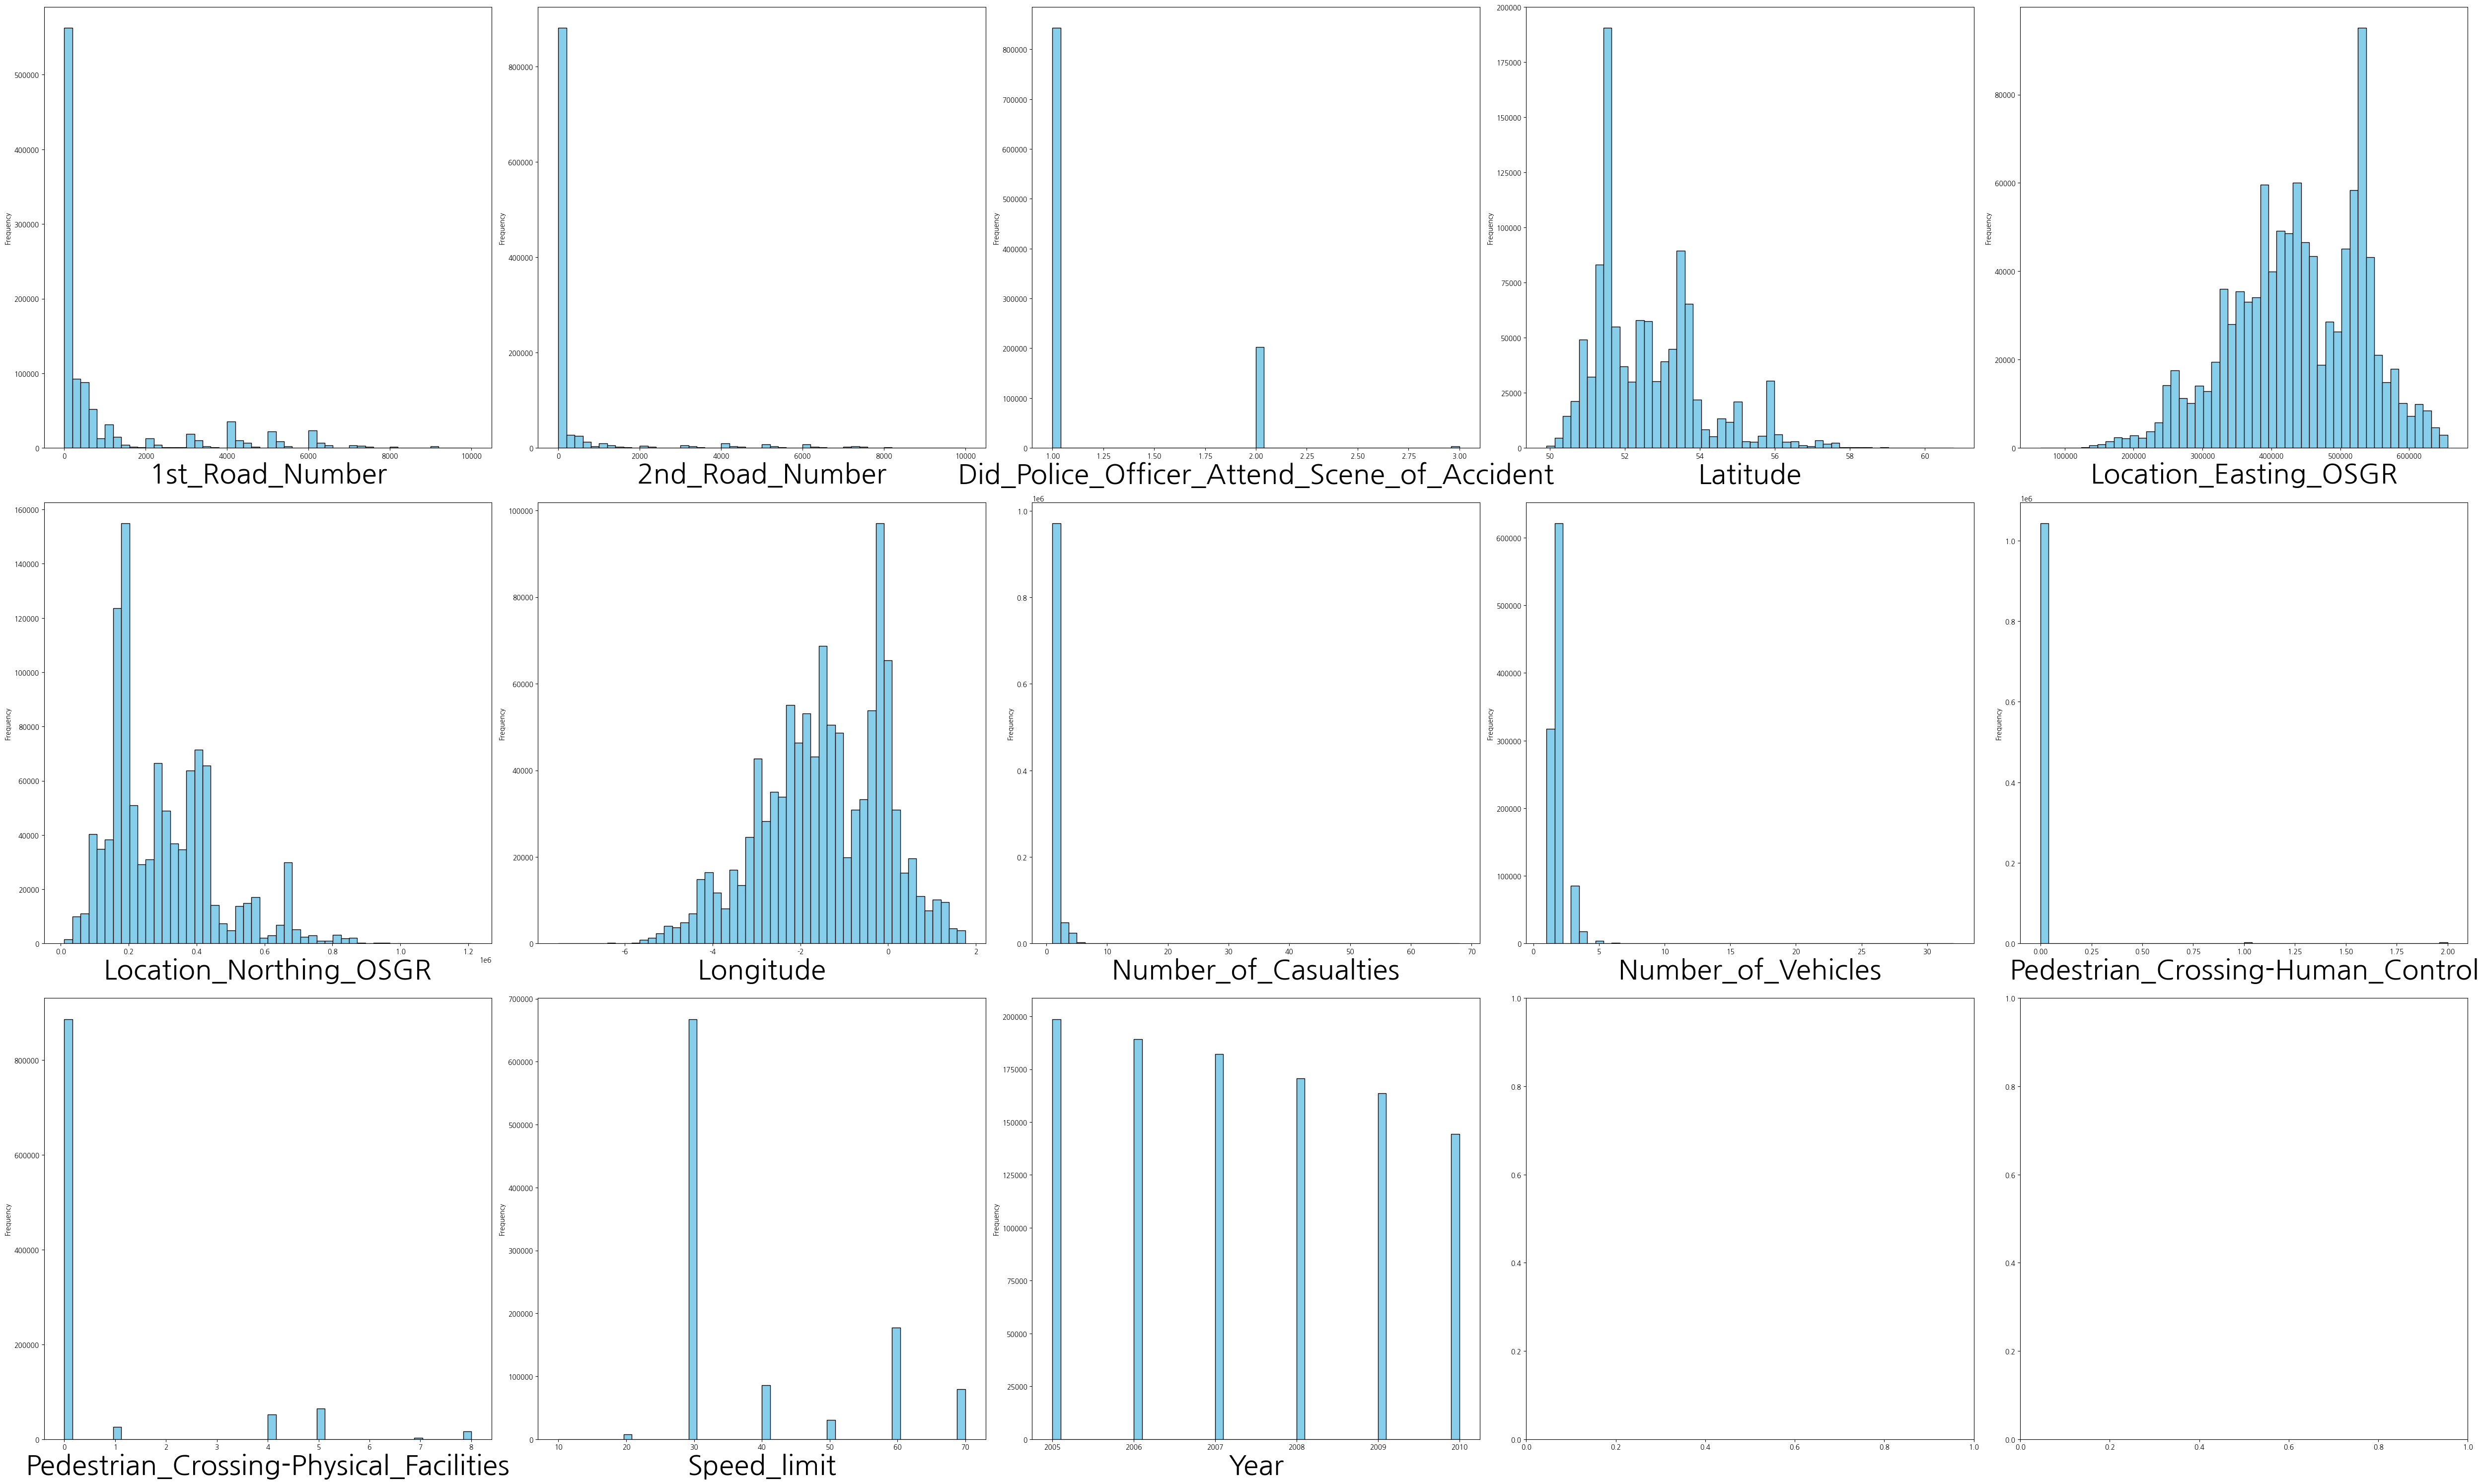

In [18]:
# 히스토그램
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 30)) #plot 생성

for i, col in enumerate(quant_vari):
    row_idx = i // num_cols
    col_idx = i % num_cols

    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    ax.hist(data[col], bins=50, color='skyblue', edgecolor='black')

    ax.set_xlabel(col, fontsize=40)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

### NaN 외에 0인 값도 일부 컬럼에선 결측치로 보임

## 2-5. 이상치 점검

### (1) 함수 설정
**GetOutlier**: IQR을 통해 이상치를 추출<br>
* df: csv파일 등에서 불러온 데이터 프레임<br>
* col: 사용하고자 하는 <u>숫자형</u> 컬럼 이름<br>
* weight: 가중치, 기본값은 1.5

In [19]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

### (2) 이상치 시각화

In [20]:
# list 형식
for numeric in quant_vari:
    GetOutlier(data, numeric)

1st_Road_Number 이상치: [1766. 1767. 1768. ... 9962. 9963. 9999.]
2nd_Road_Number 이상치: [1.000e+00 2.000e+00 3.000e+00 ... 9.962e+03 9.965e+03 9.999e+03]
Did_Police_Officer_Attend_Scene_of_Accident 이상치: [2. 3.]
Latitude 이상치: [56.421679 56.422147 56.422231 ... 60.714774 60.724682 60.757544]
Location_Easting_OSGR 이상치: [ 64950.  64980.  65350.  65860.  65950.  66690.  66710.  68290.  68880.
  70670.  73620.  73760.  74470.  74510.  74820.  75230.  75280.  75390.
  75500.  75570.  76270.  76300.  76400.  76460.  76500.  76790.  76870.
  76970.  77400.  77480.  77510.  78000.  78010.  78080.  78680.  78710.
  79280.  79910.  79920.  80010.  80040.  80100.  80280.  81850.  82640.
  82970.  84300.  84910.  85200.  85540.  85550.  85640.  85830.  86120.
  86200.  89090.  89380.  90120.  90180.  90270.  90330.  90360.  90490.
  90590.  90640.  90670.  90680.  90740.  90750.  91110.  91170.  92130.
  98480.  98540.  99520. 101140. 101200. 101480. 102230. 102850. 104090.
 104100. 104210. 107310. 1075

In [21]:
# subplot 행렬 차원 계산
target_cols = quant_vari[:-2]
num_lists = len(target_cols)
num_rows = int(num_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
num_cols = (num_lists + num_rows - 1) // num_rows  # 가장 가까운 값을 사용하여 열 개수 계산

In [22]:
#결측치 해결 후 실행
# Boxplot 형식
"""fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 30)) #plot 생성

for i, col in enumerate(target_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    ax.boxplot(data[col])
    ax.set_xticklabels([col], fontsize=40)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()"""

"fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 30)) #plot 생성\n\nfor i, col in enumerate(target_cols):\n    row_idx = i // num_cols\n    col_idx = i % num_cols\n    \n    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]\n    ax.boxplot(data[col])\n    ax.set_xticklabels([col], fontsize=40)\n    ax.set_xlabel('')\n\nplt.tight_layout()\nplt.show()"

## 2-6. 결과 정리
* 결측치가 가장 큰 문제이므로 이를 해결하는 것이 급선무
    * 0이 결측치로 추정되는 컬럼(도로 번호 종류) 처리
* 기타 정제 필요:
    * 'Date', 'Time': DateTime 형식 변환
    * 'Did_Police(...)': 코드 형식인 기존 데이터를 라벨로 변환할 것인지

# 3. 가설 검증 및 연구

## 3-1. 가설 또는 연구 주제 설정
---
1. 사고발생 예측 모델
    * 독립변수: 날씨(데이터 추가), 시간대, 계절 등
2. 사고발생 빈번지역 지도 시각화